In [1]:
from pathlib import Path
import os

from astropy.nddata import CCDData
from astropy.stats import mad_std

import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
calibrated_path = Path('../realObs/fits')
reduced_images = ccdp.ImageFileCollection(calibrated_path)

In [3]:
calibrated_biases = reduced_images.files_filtered(imagetyp='bias', include_path=True)

In [4]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image

sum = 0
for bias in calibrated_biases:
    hdu = fits.open(bias)
    data = hdu[0].data 
    mean, median, std = sigma_clipped_stats(data, sigma=3.0)  
    print(mean)
    sum += mean
avg = sum / len(calibrated_biases)

980.2483487666298
980.691451777082
980.841387277303
980.8333446802186
980.9310584122103
980.9133434929123
981.1701345732715
981.1638845287449
980.9278026670588
981.0549351275265
981.065337209171


In [5]:
avg

980.894638955648

In [6]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image 
from photutils.detection import DAOStarFinder
from photutils.detection import StarFinder

import os
import pandas as pd
import glob
import numpy as np
from astropy import units as u

In [7]:
f = sorted(glob.glob(os.path.join("../realObs/fits/*flat_V*.fits")))
sum  = arr = [[0]*3056]*3056
for i in f:
    #print(i)
    hdu = fits.open(i)
    hdu=hdu[0]
    data = hdu.data   
    sum += hdu.data
v_flat = sum/8
mean, median, std = sigma_clipped_stats(v_flat) 
v_flat = v_flat / mean

In [62]:
f = sorted(glob.glob(os.path.join("../realObs/fits/*flat_B*.fits")))
sum  = arr = [[0]*3056]*3056
for i in f:
    #print(i)
    hdu = fits.open(i)
    hdu=hdu[0]
    data = hdu.data   
    sum += hdu.data
b_flat = sum/ 8
mean, median, std = sigma_clipped_stats(b_flat) 
b_flat = b_flat / mean

In [63]:
hdu = fits.open('../realObs/fits/NGC5272_V_new.fits')
hdu=hdu[0]
data = hdu.data / v_flat  
data = data - 980.894638955648
mean, median1, std = sigma_clipped_stats(data, sigma=3.0)  
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)   
sources = daofind(data -median1) 
for col in sources.colnames:  
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'  # for consistent table output

In [64]:
hdu = fits.open('../realObs/fits/NGC5272_B.fits')
hdu=hdu[0]
data = hdu.data/b_flat 
data = data - 980.894638955648
mean, median2, std = sigma_clipped_stats(data, sigma=3.0)  
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources2 = daofind(data - median2) 
for col in sources2.colnames:  
    if col not in ('id', 'npix'):
        sources2[col].info.format = '%.2f'  # for consistent table output

In [65]:
Vtable = sources.to_pandas()
Btable = sources2.to_pandas()

In [66]:
Btable["xcentroid_adj"] = Btable["xcentroid"]+ (2110.64 - 2102.6)
Btable["ycentroid_adj"] = Btable["ycentroid"]-(1931.58 - 1929.39)

In [67]:
merge = Btable.merge(Vtable, how='cross',suffixes=('_B', '_V'))

In [109]:
result = merge [(merge["xcentroid_B"] <= merge["xcentroid_V"] + 4) & (merge["xcentroid_B"] >= merge["xcentroid_V"] - 4 )  & (merge["ycentroid_B"] <= merge["ycentroid_V"] + 4 )  & (merge["ycentroid_B"] >= merge["ycentroid_V"] - 4 ) ]

In [75]:
result

,id_B,xcentroid_B,ycentroid_B,sharpness_B,roundness1_B,roundness2_B,npix_B,sky_B,peak_B,flux_B,...,xcentroid_V,ycentroid_V,sharpness_V,roundness1_V,roundness2_V,npix_V,sky_V,peak_V,flux_V,mag_V
1339,3,3048.988917,15.524277,0.981676,0.193157,0.448857,25,0.0,463.058367,1.498277,...,3048.959976,15.556285,0.925354,0.301791,0.570443,25,0.0,418.233262,1.193628,-0.192173
2677,5,962.956561,18.811683,0.999139,0.372823,0.444391,25,0.0,267.937752,1.079013,...,962.919504,18.651493,0.904845,-0.328284,0.109681,25,0.0,281.085448,1.240484,-0.233978
13379,21,2236.566159,106.021409,0.910405,-0.248111,-0.495225,25,0.0,317.230270,1.550578,...,2236.690394,105.986017,0.930004,-0.052854,-0.350617,25,0.0,302.819534,1.455061,-0.407203
24744,38,406.988459,203.584322,0.871649,0.348298,0.543267,25,0.0,525.173310,2.341174,...,407.037481,203.582840,0.956499,0.573475,0.622322,25,0.0,528.994264,2.183321,-0.847794
39451,60,1246.503960,346.000748,0.960215,-0.209594,-0.469550,25,0.0,589.489808,2.521077,...,1246.524926,345.988877,0.961483,-0.180492,-0.456431,25,0.0,615.962388,2.630364,-1.050040
52166,79,1238.673620,462.898519,0.799680,-0.518147,-0.405406,25,0.0,506.569060,1.386687,...,1237.860492,462.678663,0.774387,-0.465562,-0.467845,25,0.0,717.058477,1.374657,-0.345486
58850,89,1259.106265,526.462378,0.841658,-0.382566,0.279327,25,0.0,258.585697,1.254644,...,1259.150094,526.488704,0.760407,-0.277019,0.127202,25,0.0,233.586206,1.172030,-0.172347
64868,98,1740.983741,594.533210,0.953378,-0.056344,0.479464,25,0.0,263.096580,1.253867,...,1740.991169,594.694622,0.982442,0.245175,0.547330,25,0.0,248.744874,1.154575,-0.156055
74904,113,2722.019285,666.533483,0.871781,0.400140,0.441074,25,0.0,312.696016,1.654608,...,2722.028695,666.493875,0.921154,0.013684,0.390342,25,0.0,317.236075,1.593801,-0.506085
75574,114,1740.044663,671.298944,0.950241,0.320142,0.518615,25,0.0,187.164417,1.002799,...,1740.015856,671.555982,0.880885,-0.077360,0.208762,25,0.0,192.111717,1.029864,-0.031950


In [84]:
result = result[(result["xcentroid_V"] >= 1000) & (result["xcentroid_V"] <= 2000)  & (result["ycentroid_V"] >= 1000)  & (result["ycentroid_V"] <= 2000)]

In [96]:
result1 = result[(result["xcentroid_V"] >= 1400) & (result["xcentroid_V"] <= 1600)  & (result["ycentroid_V"] >= 1300)  & (result["ycentroid_V"] <= 1500)]

In [97]:
result1

,id_B,xcentroid_B,ycentroid_B,sharpness_B,roundness1_B,roundness2_B,npix_B,sky_B,peak_B,flux_B,...,xcentroid_V,ycentroid_V,sharpness_V,roundness1_V,roundness2_V,npix_V,sky_V,peak_V,flux_V,mag_V
167957,252,1550.979815,1456.037273,0.500422,0.657312,-0.373520,25,0.0,3633.693732,1.052648,...,1550.439445,1454.067056,0.306339,-0.082988,-0.044320,25,0.0,4474.359461,1.414640,-0.376615
167962,252,1550.979815,1456.037273,0.500422,0.657312,-0.373520,25,0.0,3633.693732,1.052648,...,1549.984731,1457.018661,0.419314,-0.068303,-0.358491,25,0.0,4674.342206,1.207119,-0.204375
167964,252,1550.979815,1456.037273,0.500422,0.657312,-0.373520,25,0.0,3633.693732,1.052648,...,1549.655538,1456.605272,0.555309,0.284386,-0.348132,25,0.0,4797.557197,1.213148,-0.209784
171991,258,1568.956380,1470.774172,0.438281,0.138327,-0.229798,25,0.0,5511.546549,1.101096,...,1572.049109,1474.535337,0.422630,0.315704,0.156865,25,0.0,7193.465183,1.109607,-0.112923
172659,259,1568.595735,1470.948562,0.452553,0.526253,-0.187017,25,0.0,5395.579221,1.021161,...,1572.049109,1474.535337,0.422630,0.315704,0.156865,25,0.0,7193.465183,1.109607,-0.112923
176669,265,1510.059293,1481.933377,0.540946,0.314065,-0.138319,25,0.0,2976.239869,1.166565,...,1511.912254,1479.023187,0.287721,0.024665,-0.624155,25,0.0,4362.139891,1.502341,-0.441921
178024,267,1536.483769,1487.357408,0.416700,-0.059608,-0.037659,25,0.0,4687.729308,1.141204,...,1536.903494,1487.464916,0.791363,0.246414,-0.034545,25,0.0,6872.918775,2.217951,-0.864880
178031,267,1536.483769,1487.357408,0.416700,-0.059608,-0.037659,25,0.0,4687.729308,1.141204,...,1540.009506,1490.581208,0.656024,-0.136877,0.502682,25,0.0,6884.874716,2.520608,-1.003763
178692,268,1535.958683,1487.516345,0.338515,-0.065071,-0.271151,25,0.0,4822.766536,1.256037,...,1536.903494,1487.464916,0.791363,0.246414,-0.034545,25,0.0,6872.918775,2.217951,-0.864880


In [85]:
result["mag_V"] = result["mag_V"] 

In [86]:
result["mag_B"] = result["mag_B"] 

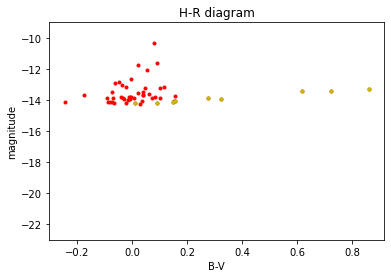

In [110]:

# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = result["mag_B"] - result["mag_V"] 
# corresponding y axis values
y = -1 * (result["mag_V"] + 14.3)

# plotting the points 
scatter = plt.plot(x, y,'.r')

x1 = result1["mag_B"] - result1["mag_V"]
y1 = -1 * (result1["mag_V"] + 14.3)

scatter = plt.plot(x1,y1,'.y' )


#ax = scatter.axes
#plt.yaxis_inverted

# naming the x axis
plt.xlabel('B-V')
# naming the y axis
plt.ylabel('magnitude')
#plt.xlim(-0.5,1.7)
plt.ylim(-23,-9)
# giving a title to my graph
plt.title('H-R diagram')

  
# function to show the plot
plt.show()

In [80]:
result

,id_B,xcentroid_B,ycentroid_B,sharpness_B,roundness1_B,roundness2_B,npix_B,sky_B,peak_B,flux_B,...,xcentroid_V,ycentroid_V,sharpness_V,roundness1_V,roundness2_V,npix_V,sky_V,peak_V,flux_V,mag_V
1339,3,3048.988917,15.524277,0.981676,0.193157,0.448857,25,0.0,463.058367,1.498277,...,3048.959976,15.556285,0.925354,0.301791,0.570443,25,0.0,418.233262,1.193628,-0.192173
2677,5,962.956561,18.811683,0.999139,0.372823,0.444391,25,0.0,267.937752,1.079013,...,962.919504,18.651493,0.904845,-0.328284,0.109681,25,0.0,281.085448,1.240484,-0.233978
13379,21,2236.566159,106.021409,0.910405,-0.248111,-0.495225,25,0.0,317.230270,1.550578,...,2236.690394,105.986017,0.930004,-0.052854,-0.350617,25,0.0,302.819534,1.455061,-0.407203
24744,38,406.988459,203.584322,0.871649,0.348298,0.543267,25,0.0,525.173310,2.341174,...,407.037481,203.582840,0.956499,0.573475,0.622322,25,0.0,528.994264,2.183321,-0.847794
39451,60,1246.503960,346.000748,0.960215,-0.209594,-0.469550,25,0.0,589.489808,2.521077,...,1246.524926,345.988877,0.961483,-0.180492,-0.456431,25,0.0,615.962388,2.630364,-1.050040
52166,79,1238.673620,462.898519,0.799680,-0.518147,-0.405406,25,0.0,506.569060,1.386687,...,1237.860492,462.678663,0.774387,-0.465562,-0.467845,25,0.0,717.058477,1.374657,-0.345486
58850,89,1259.106265,526.462378,0.841658,-0.382566,0.279327,25,0.0,258.585697,1.254644,...,1259.150094,526.488704,0.760407,-0.277019,0.127202,25,0.0,233.586206,1.172030,-0.172347
64868,98,1740.983741,594.533210,0.953378,-0.056344,0.479464,25,0.0,263.096580,1.253867,...,1740.991169,594.694622,0.982442,0.245175,0.547330,25,0.0,248.744874,1.154575,-0.156055
74904,113,2722.019285,666.533483,0.871781,0.400140,0.441074,25,0.0,312.696016,1.654608,...,2722.028695,666.493875,0.921154,0.013684,0.390342,25,0.0,317.236075,1.593801,-0.506085
75574,114,1740.044663,671.298944,0.950241,0.320142,0.518615,25,0.0,187.164417,1.002799,...,1740.015856,671.555982,0.880885,-0.077360,0.208762,25,0.0,192.111717,1.029864,-0.031950


/tmp/ipykernel_475/2834730192.py:24: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data, cmap='Greys', origin='lower', norm=norm,interpolation='nearest',vmax = 7000)
/tmp/ipykernel_475/2834730192.py:35: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(pixel_plot)


AttributeError: 'Figure' object has no attribute 'get_array'

<Figure size 432x288 with 0 Axes>

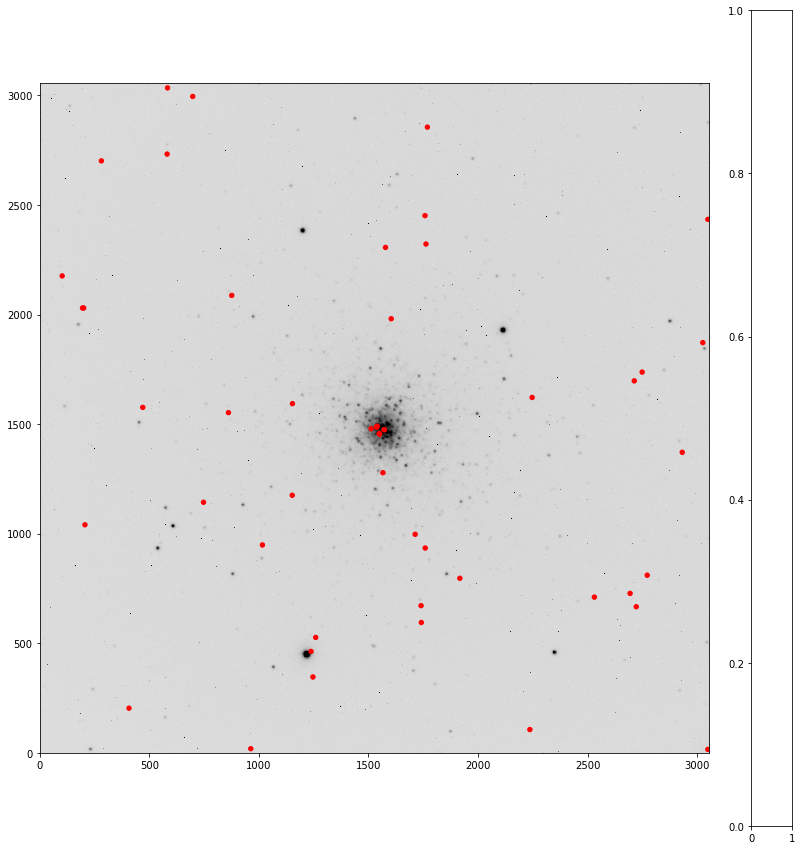

In [120]:
from astropy.io import fits
import os
import pandas as pd
import glob
import numpy as np
from astropy import units as u

hdu = fits.open('../realObs/fits/NGC5272_V_new.fits')
hdu=hdu[0]
data = hdu.data

# importing modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
from matplotlib.patches import Arrow, Circle

# customizing plot
norm = ImageNormalize(stretch=SqrtStretch())

pixel_plot = plt.figure()
fig, ax = plt.subplots(1,figsize=(15, 15))
ax.imshow(data, cmap='Greys', origin='lower', norm=norm,interpolation='nearest',vmax = 7000)

patches = []
#Circle((1000, 1000), radius=25, color='red')

for index, row in result.iterrows():
    patches.append(Circle((row['xcentroid_V'], row['ycentroid_V']), radius=10, color='red'))
    
for p in patches:
    ax.add_patch(p)

plt.colorbar(pixel_plot)
plt.title("pixel_plot")

plt.ylim(0,3000)
plt.show(pixel_plot)

In [118]:
sources[:50]

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,21.00,0.62,0.79,-0.38,-0.55,25,0.00,301.63,1.04,-0.04
2,3053.97,0.70,0.67,0.53,0.38,25,0.00,283.43,1.10,-0.11
3,2456.52,8.72,0.93,0.75,-0.03,25,0.00,366.09,1.57,-0.49
4,3048.96,15.56,0.93,0.30,0.57,25,0.00,418.23,1.19,-0.19
5,228.93,17.40,0.58,0.07,-0.08,25,0.00,2704.53,2.21,-0.86
6,962.92,18.65,0.90,-0.33,0.11,25,0.00,281.09,1.24,-0.23
7,182.02,32.84,0.87,-0.39,-0.33,25,0.00,338.96,1.11,-0.12
8,2824.17,40.93,0.82,-0.21,-0.34,25,0.00,273.30,1.12,-0.13
9,2954.05,57.92,0.59,0.33,0.45,25,0.00,325.58,1.47,-0.42
